# Importing libraries and modules

In [95]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import accuracy_score , confusion_matrix , r2_score , mean_absolute_percentage_error



# Exploratory Data Analysis

In [84]:
data = pd.read_csv('bangalore house price prediction OHE-data.csv')

print("----------------------------\n")
print("The information of the Data" , data.info())
print("\n----------------------------")
data.head()

----------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7120 entries, 0 to 7119
Columns: 108 entries, bath to location_Tumkur Road
dtypes: float64(5), int64(103)
memory usage: 5.9 MB
The information of the Data None

----------------------------


,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [85]:
print("----------------------------\n")
print("The Description of all the columns of the Data\n\n" , data.describe())
print("\n----------------------------")

----------------------------

The Description of all the columns of the Data

               bath      balcony        price  total_sqft_int          bhk  \
count  7120.000000  7120.000000  7120.000000     7120.000000  7120.000000   
mean      2.390871     1.572759    96.454991     1479.729806     2.465169   
std       0.876822     0.770583   116.185034      913.779769     0.841520   
min       1.000000     0.000000    10.000000      350.000000     1.000000   
25%       2.000000     1.000000    49.230000     1100.000000     2.000000   
50%       2.000000     2.000000    69.000000     1255.000000     2.000000   
75%       3.000000     2.000000   104.000000     1640.250000     3.000000   
max       9.000000     3.000000  2912.000000    30400.000000     9.000000   

       price_per_sqft  area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
count     7120.000000                    7120.000000              7120.000000   
mean      5923.806855                       0.750702             

In [86]:
print("----------------------------\n")
print("Check if there is any missing values in the data\n\n" , data.isnull().sum())
print("\n----------------------------")

----------------------------

Check if there is any missing values in the data

 bath                           0
balcony                        0
price                          0
total_sqft_int                 0
bhk                            0
                              ..
location_Hosur Road            0
location_Horamavu Banaswadi    0
location_Domlur                0
location_Mahadevpura           0
location_Tumkur Road           0
Length: 108, dtype: int64

----------------------------


In [87]:
data.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
bath,1.000000,0.283192,0.523941,0.653435,0.882461,0.350497,-0.118940,0.030143,0.161243,0.022495,...,-0.010388,-0.019047,-0.015385,0.002339,0.049603,0.011201,-0.020635,0.006606,-0.017608,-0.002474
balcony,0.283192,1.000000,0.138946,0.200648,0.269511,0.068018,0.120220,-0.048382,-0.138809,0.117337,...,0.027585,-0.015110,-0.018297,0.022038,0.024569,-0.020262,0.022541,0.000445,0.008764,-0.018788
price,0.523941,0.138946,1.000000,0.797955,0.497817,0.717821,-0.114594,-0.014613,0.229543,0.012542,...,-0.015052,-0.023919,-0.017011,0.019606,0.045599,0.000618,-0.021200,0.019573,-0.015800,-0.006216
total_sqft_int,0.653435,0.200648,0.797955,1.000000,0.647485,0.376673,-0.133719,0.014041,0.219383,0.009710,...,-0.012294,-0.021914,-0.016353,0.003619,0.037007,0.007224,-0.015287,0.007875,-0.011000,-0.010931
bhk,0.882461,0.269511,0.497817,0.647485,1.000000,0.323285,-0.142496,0.044187,0.178557,0.043887,...,-0.009725,-0.021754,-0.011599,-0.002366,0.043803,0.016102,-0.026186,0.005351,-0.010418,0.008504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
location_Hosur Road,0.011201,-0.020262,0.000618,0.007224,0.016102,0.001412,0.001408,0.001151,-0.003231,-0.036076,...,-0.003028,-0.003028,-0.002958,-0.002958,-0.002958,1.000000,-0.002887,-0.002887,-0.002887,-0.002887
location_Horamavu Banaswadi,-0.020635,0.022541,-0.021200,-0.015287,-0.026186,-0.037227,0.024451,-0.018187,-0.013638,0.027142,...,-0.002955,-0.002955,-0.002887,-0.002887,-0.002887,-0.002887,1.000000,-0.002817,-0.002817,-0.002817
location_Domlur,0.006606,0.000445,0.019573,0.007875,0.005351,0.054259,0.006048,0.002433,-0.013638,0.020595,...,-0.002955,-0.002955,-0.002887,-0.002887,-0.002887,-0.002887,-0.002817,1.000000,-0.002817,-0.002817
location_Mahadevpura,-0.017608,0.008764,-0.015800,-0.011000,-0.010418,-0.023633,0.030585,-0.025060,-0.013638,0.027142,...,-0.002955,-0.002955,-0.002887,-0.002887,-0.002887,-0.002887,-0.002817,-0.002817,1.000000,-0.002817


# Feature Selection 

In [88]:
## Dropping the features which are negatively or close to zero correlated with the price column

new_data = data[['bath' , 'balcony', 'total_sqft_int' , 'bhk' , 'price_per_sqft' , 'area_typePlot  Area' , 'price']]

In [89]:
new_data.head()

,bath,balcony,total_sqft_int,bhk,price_per_sqft,area_typePlot Area,price
0,3.0,2.0,1672.0,3,8971.291866,0,150.0
1,3.0,3.0,1750.0,3,8514.285714,0,149.0
2,3.0,2.0,1750.0,3,8571.428571,0,150.0
3,2.0,2.0,1250.0,2,3200.000000,0,40.0
4,2.0,2.0,1200.0,2,6916.666667,1,83.0


# Distribution

C:\Users\Himanshu\AppData\Local\Temp\ipykernel_4676\3226784977.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['total_sqft_int'])
C:\Users\Himanshu\AppData\Local\Temp\ipykernel_4676\3226784977.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['price_per_sqft'])


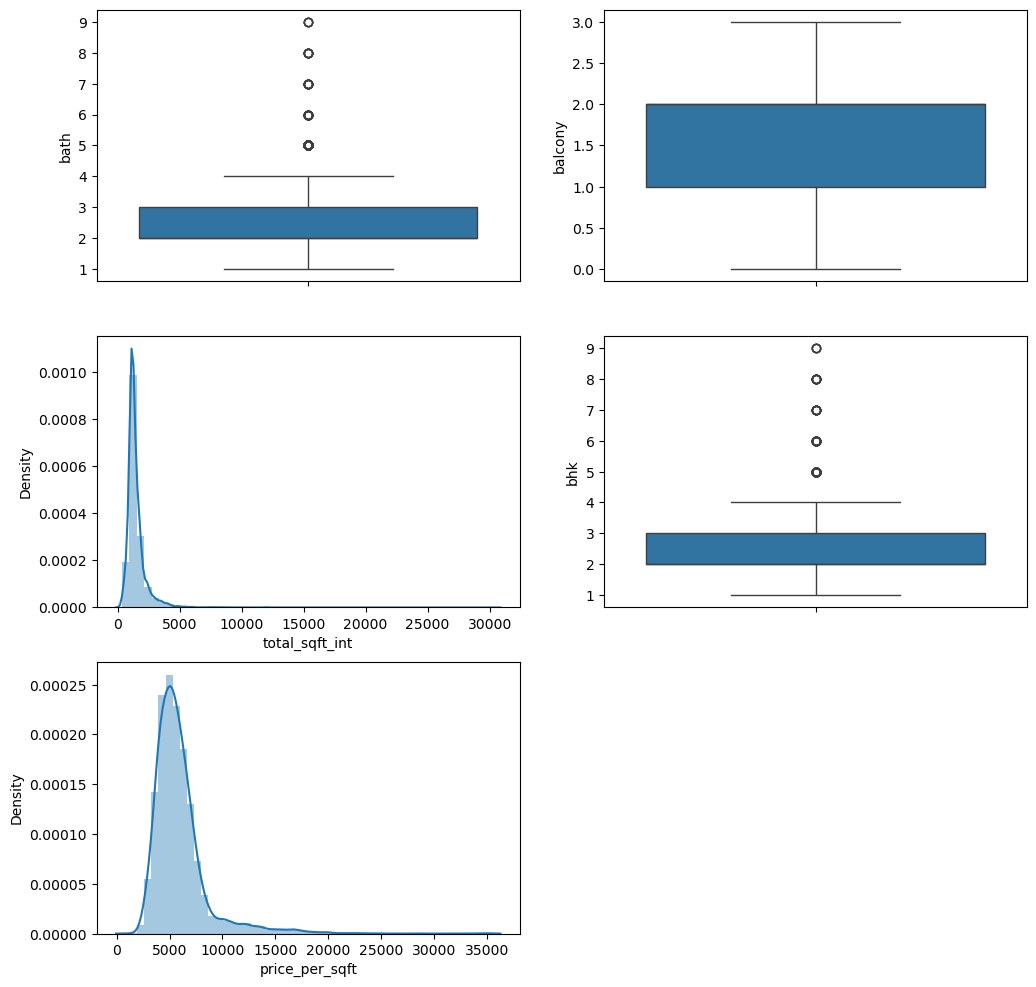

In [90]:
plt.figure(figsize = (12,12))

plt.subplot(3,2,1)
sns.boxplot(new_data['bath'])
plt.savefig('Graphs/bath.png')

plt.subplot(3,2,2)
sns.boxplot(new_data['balcony'])
plt.savefig('Graphs/balcony.png')

plt.subplot(3,2,3)
sns.distplot(new_data['total_sqft_int'])
plt.savefig('Graphs/total_sqft_int.png')         

plt.subplot(3,2,4)
sns.boxplot(new_data['bhk'])
plt.savefig('Graphs/bhk.png')

plt.subplot(3,2,5)
sns.distplot(new_data['price_per_sqft'])
plt.savefig('Graphs/price_per_sqft.png')            
        

# Data Splitting

In [91]:
X = new_data.drop(['price'] , axis = 1)
y = new_data['price']

In [92]:
X_train , X_test , y_train , y_test = train_test_split(X  , y , test_size= 0.2 , random_state= 2)

# Model Building 

In [93]:
knn = KNeighborsRegressor(n_neighbors= 5)

knn.fit(X_train , y_train)
print("Rhe Model is fitted")

Rhe Model is fitted


In [94]:
knn.score(X_train , y_train)

0.9474049518948364

# Model Evaluation

In [106]:
pred = knn.predict(X_test)
y_pred = pred.round()
pd.DataFrame({'Actual' : y_test , 'Predicted' : y_pred })

,Actual,Predicted
4423,72.0,70.0
6520,34.0,34.0
6173,85.0,85.0
3485,155.0,152.0
4034,18.0,21.0
...,...,...
2538,96.0,96.0
5514,54.0,54.0
4390,28.0,30.0
1490,32.0,32.0


In [104]:
score = r2_score(y_test , y_pred)
error = mean_absolute_percentage_error(y_test , y_pred)

print("The score of the model is :" , round(score , 2))
print("The error of the model is :" ,round(error , 2))

The score of the model is : 0.97
The error of the model is : 0.02
